[# 1965-2016全球重大地震数据](https://www.kesci.com/home/dataset/58d1172797c4b112cbb826db) 

# **背景介绍**

每年全球可探测到的地震数量超过50万，其中10万可被人类感知，只有100次会造成损失；而正是这100次地震中最严重的几起，给我们带来了无法磨灭的惨痛回忆。  
由美国国家地震中心收集的这组数据，记录了全世界所有显著地震的地点和震级，共记录了自1965年报告的震级为5.5以上地震的发生日期，时间，位置，深度，大小和来源数据，提供给大家通过分析展现自己的洞察力。

### 如何在线使用数据集

创建项目后：  
Python用户，输入`ls ../input/earthquake/`  查看数据路径  
R用户，输入`list.files("../input/earthquake/")`查看数据路径  
使用相关包读取数据

# **数据描述**

# 数据字典

1.`earthquake.csv`

变量名  | Date | Time | Latitude | Longitude | Type | Depth | Depth Error | Depth Seismic Stations | Magnitude | Magnitude Type | Magnitude Error | Magnitude Seismic Stations | Azimuthal Gap | Horizontal Distance | Horizontal Error | Root Mean Square | ID | Source | Location Source | Magnitude Source | Status
---- | ---- | ---- | -------- | --------- | ---- | ----- | ----------- | ---------------------- | --------- | -------------- | --------------- | -------------------------- | ------------- | ------------------- | ---------------- | ---------------- | -- | ------ | --------------- | ---------------- | ------
变量解释 | 日期   | 时间   | 纬度       | 经度        | 类型   | 深度    | 深度误差        | 深度监测站                  | 震级        | 震级类型           | 震级误差            | 震级监测站                      | 开口位置          | 水平距离                | 水平误差             | 均方根              | 序号 | 来源     | 地址来源            | 震级来源             | 状态    

---

> 如果您对数据集有疑问或建议，可以提交意见反馈给我们哦 。
# seaborn可视化之heatmap & time series & regression
之前尝试了用seaborn去做category和distribution可视化。时间序列的数据也是数据分析&挖掘的常客，这次选取了1965-2016全球重大地震数据做一些可视化及分析。主要研究下seaborn中heatmap，time series 以及regression function的使用。

seaborn中的plot function:        
    * heatmap: 用颜色矩阵去显示数据在两个维度下的度量值    
    * tsplot: 用时间维度序列去展现数据的不确定性    
    * regplot: 用线性回归模型对数据做拟合
    * residplot: 展示线性回归模型拟合后各点对应的残值. 

In [1]:
ls ../input/earthquake/

earthquake@  earthquake.csv*


In [2]:
cd ../input/earthquake/

/kesci/data/earthquake


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('earthquake.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data = data[data['Type'] == 'Earthquake']

**先尝试用countplot作图，看看到底每年有多少地震发生**

In [5]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

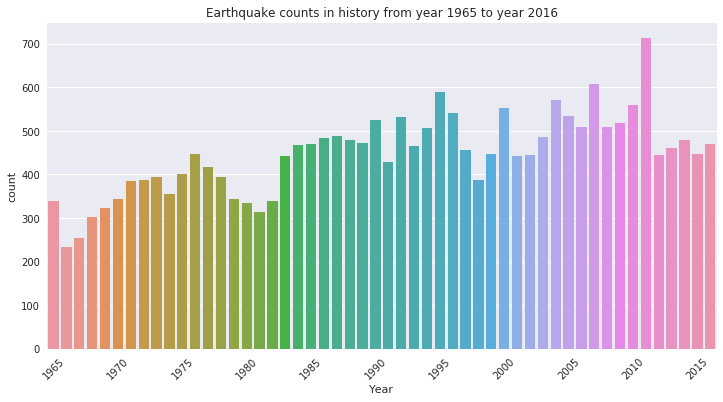

In [6]:
plt.figure(1,figsize=(12,6))
Year = [i for i in range(1965,2017,5)]
idx = [i for i in range(0,52,5)]
sns.countplot(data['Year'])
plt.setp(plt.xticks(idx,Year)[1],rotation=45)
plt.title('Earthquake counts in history from year 1965 to year 2016')
plt.show()

**作热力图heatmap去看看近十年来的地震记录**   
热力图的特点就在于定义两个具有意义的dimension，然后看数据在这两个dimension下的统计情况，完成对比分析。比如在下图中，我们将近十年来的地震记录数按照年份和月份做热力图。

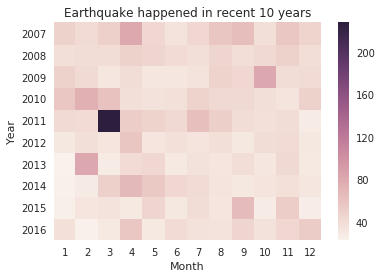

In [7]:
test = data.groupby([data['Year'],data['Month']],as_index=False).count()
new = test[['Year','Month','ID']]
temp = new.iloc[-120:,:]
temp = temp.pivot('Year','Month','ID')
sns.heatmap(temp)
plt.title('Earthquake happened in recent 10 years')
plt.show()

**做时间序列图去探究以年为单位，地震记录的趋势**

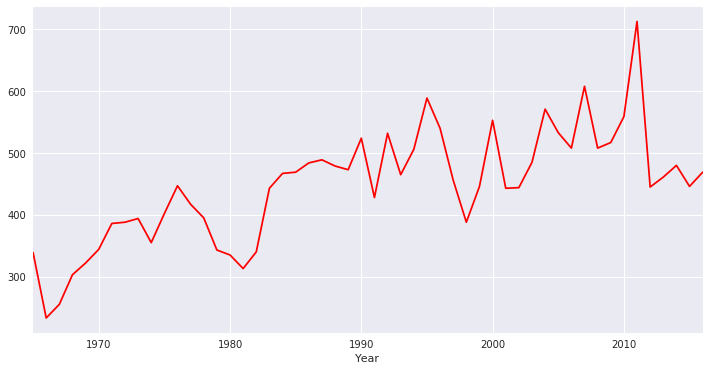

In [8]:
temp = data.groupby('Year',as_index=False).count()
temp = temp.loc[:,['Year','ID']]
plt.figure(1,figsize=(12,6))
sns.tsplot(temp.ID,temp.Year,color="r")
plt.show()

**对以年为单位的地震记录作线性回归拟合**

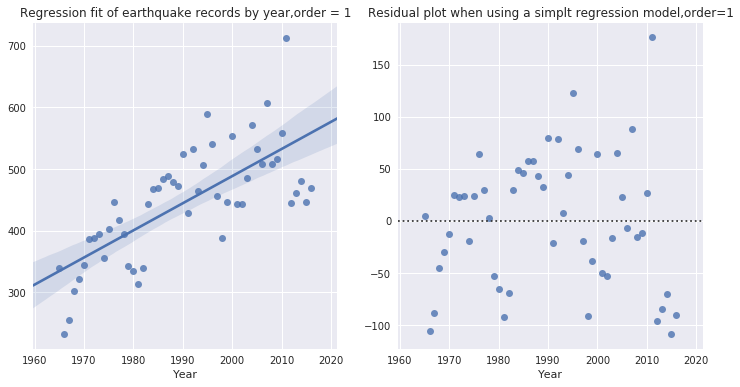

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=1) # default by 1
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 1')

plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=1')
plt.show()


上方分别是对地震记录以年为单位统计之后的一阶线性回归拟合以及拟合后残值分布的情况。同样的思路，可以尝试高阶拟合，如下图的二阶拟合。

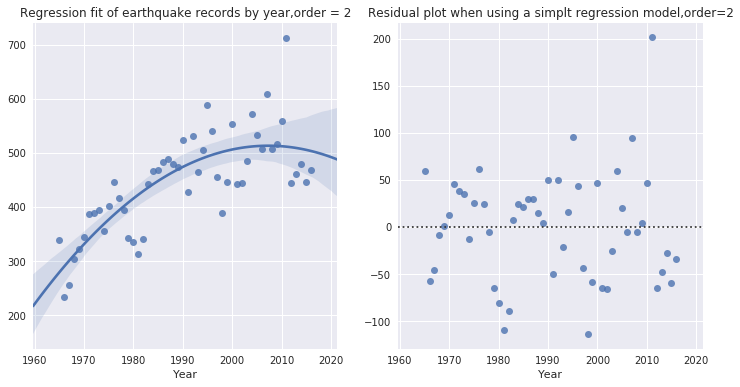

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=2) # default by 1
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 2')

plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp,order=2)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=2')

plt.show()


同样的尝试，我们可以对地震记录中的深度Depth和强度Magnitude做线性拟合。

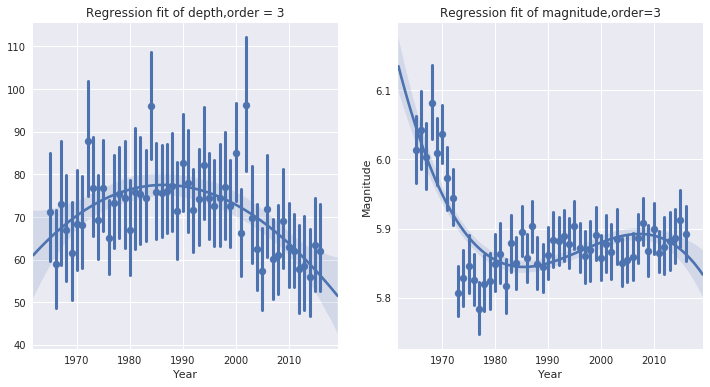

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="Depth", data=data,x_jitter=.05, x_estimator=np.mean,order=3)
  # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.ylabel(' ')
plt.title('Regression fit of depth,order = 3')

plt.subplot(122)
sns.regplot(x="Year", y="Magnitude", data=data,x_jitter=.05, x_estimator=np.mean,order=3)
    # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.title('Regression fit of magnitude,order=3')
plt.show()